In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [45]:
#import csv_file
csv_file='Resources/Crime_Data_LA_from_2010_to_Present.csv'

In [46]:
#convert csv to dataframe
crime_data_df=pd.read_csv(csv_file)

#Extract year in order to limit data range to 2016 - 2018
crime_data_df["year"]=pd.DatetimeIndex(crime_data_df["DATE OCC"]).year

#crime_data_df.head()
crime_data_df.shape

(2109752, 29)

In [47]:
#Filter out years before 2016 and after 2018
crime_data_df_3yrs = crime_data_df[crime_data_df['year']>=2016]
crime_data_df_3yrs = crime_data_df_3yrs[crime_data_df['year']<=2018]
crime_data_df_3yrs.shape

C:\Users\mafgl\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


(682922, 29)

In [48]:
#combining similar offenses together
crime_data_clean_df=crime_data_df_3yrs.replace({'BATTERY - SIMPLE ASSAULT' : 'ASSAULT', 'BURGLARY FROM VEHICLE' : 'THEFT', 'VEHICLE - STOLEN' : 'THEFT', 'THEFT PLAIN - PETTY ($950 & UNDER)' : 'THEFT', 'BURGLARY' : 'THEFT', 'THEFT OF IDENTITY' : 'THEFT', 'INTIMATE PARTNER - SIMPLE ASSAULT' : 'ASSAULT', 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)' : 'VANDALISM', 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT' : 'ASSAULT', 'VANDALISM - MISDEAMEANOR ($399 OR UNDER)' : 'VANDALISM', 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)' : 'THEFT', 'ROBBERY' : 'THEFT', 'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD' : 'THEFT', 'CRIMINAL THREATS - NO WEAPON DISPLAYED' : 'Other', 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)' : 'THEFT', 'THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER)' : 'THEFT', 'DOCUMENT FORGERY / STOLEN FELONY' : 'THEFT', 'TRESPASSING' : 'Other', 'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD' : 'Other', 'OTHER MISCELLANEOUS CRIME' : 'Other', 'VIOLATION OF COURT ORDER' : 'Other', 'VIOLATION OF RESTRAINING ORDER' : 'Other', 'BRANDISH WEAPON' : 'Other', 'INTIMATE PARTNER - AGGRAVATED ASSAULT' : 'ASSAULT', 'THEFT, PERSON' : 'THEFT', 'BIKE - STOLEN' : 'THEFT', 'BURGLARY, ATTEMPTED' : 'THEFT', 'ATTEMPTED ROBBERY' : 'THEFT', 'BATTERY WITH SEXUAL CONTACT' : 'SEX CRIMES', 'RAPE, FORCIBLE' : 'SEX CRIMES', 'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT' : 'ASSAULT', 'BUNCO, GRAND THEFT' : 'THEFT', 'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)' : 'Other', 'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)' : 'THEFT', 'BUNCO, PETTY THEFT' : 'THEFT', 'CHILD NEGLECT (SEE 300 W.I.C.)' : 'Other', 'CHILD ANNOYING (17YRS & UNDER)' : 'Other', 'BATTERY POLICE (SIMPLE)' : 'Other', 'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)' : 'THEFT', 'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ' : 'SEX CRIMES', 'OTHER ASSAULT' : 'ASSAULT', 'CONTEMPT OF COURT' : 'Other', 'DISCHARGE FIREARMS/SHOTS FIRED' : 'Other', 'DISTURBING THE PEACE' : 'Other', 'ARSON' : 'Other', 'INDECENT EXPOSURE' : 'Other', 'VEHICLE - ATTEMPT STOLEN' : 'THEFT', 'RESISTING ARREST' : 'Other', 'THREATENING PHONE CALLS/LETTERS' : 'Other', 'BURGLARY FROM VEHICLE, ATTEMPTED' : 'THEFT', 'CRIMINAL HOMICIDE' : 'Other', 'SEXUAL PENETRATION W/FOREIGN OBJECT' : 'SEX CRIMES', 'EXTORTION' : 'Other', 'SHOTS FIRED AT INHABITED DWELLING' : 'Other', 'DEFRAUDING INNKEEPER/THEFT OF SERVICES, $400 & UNDER' : 'THEFT', 'KIDNAPPING' : 'Other', 'STALKING' : 'Other', 'ORAL COPULATION' : 'Other', 'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT' : 'ASSAULT', 'THEFT PLAIN - ATTEMPT' : 'THEFT', 'THROWING OBJECT AT MOVING VEHICLE' : 'VANDALISM', 'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER' : 'ASSAULT', 'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH' : 'SEX CRIMES', 'UNAUTHORIZED COMPUTER ACCESS' : 'Other', 'VIOLATION OF TEMPORARY RESTRAINING ORDER' : 'Other', 'LEWD CONDUCT' : 'Other', 'CRUELTY TO ANIMALS' : 'Other', 'THEFT FROM MOTOR VEHICLE - ATTEMPT' : 'THEFT', 'BOMB SCARE' : 'Other', 'PURSE SNATCHING' : 'THEFT', 'PEEPING TOM' : 'Other', 'CHILD STEALING' : 'Other', 'RAPE, ATTEMPTED' : 'SEX CRIMES', 'PICKPOCKET' : 'THEFT', 'FALSE IMPRISONMENT' : 'Other', 'PROWLER' : 'Other', 'COUNTERFEIT' : 'Other', 'CREDIT CARDS, FRAUD USE ($950.01 & OVER)' : 'Other', 'BUNCO, ATTEMPT' : 'Other', 'KIDNAPPING - GRAND ATTEMPT' : 'Other', 'EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)' : 'THEFT', 'FAILURE TO YIELD' : 'Other', 'ILLEGAL DUMPING' : 'Other', 'DRIVING WITHOUT OWNER CONSENT (DWOC)' : 'Other', 'PIMPING' : 'SEX CRIMES', 'HUMAN TRAFFICKING - COMMERCIAL SEX ACTS' : 'SEX CRIMES', 'FALSE POLICE REPORT' : 'Other', 'DOCUMENT WORTHLESS ($200.01 & OVER)' : 'Other', 'PANDERING' : 'Other', 'BATTERY ON A FIREFIGHTER' : 'Other', 'CREDIT CARDS, FRAUD USE ($950 & UNDER' : 'Other', 'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT' : 'Other', 'THEFT FROM PERSON - ATTEMPT' : 'THEFT', 'BOAT - STOLEN' : 'THEFT', 'RECKLESS DRIVING' : 'Other', 'SHOPLIFTING - ATTEMPT' : 'THEFT', 'DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $400' : 'THEFT', 'THEFT, COIN MACHINE - PETTY ($950 & UNDER)' : 'THEFT', 'LEWD/LASCIVIOUS ACTS WITH CHILD' : 'SEX CRIMES', 'CHILD PORNOGRAPHY' : 'SEX CRIMES', 'CONTRIBUTING' : 'Other', 'WEAPONS POSSESSION/BOMBING' : 'Other', 'DISHONEST EMPLOYEE - GRAND THEFT' : 'THEFT', 'DISHONEST EMPLOYEE - PETTY THEFT' : 'THEFT', 'CHILD ABANDONMENT' : 'Other', 'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE' : 'SEX CRIMES', 'TILL TAP - PETTY ($950 & UNDER)' : 'Other', 'GRAND THEFT / INSURANCE FRAUD' : 'THEFT', 'DOCUMENT WORTHLESS ($200 & UNDER)' : 'Other', 'VEHICLE - MOTORIZED SCOOTERS, BICYCLES, AND WHEELCHAIRS' : 'Other', 'CONSPIRACY' : 'Other', 'PURSE SNATCHING - ATTEMPT' : 'THEFT', 'DRUGS, TO A MINOR' : 'Other', 'THEFT, COIN MACHINE - GRAND ($950.01 & OVER)' : 'THEFT', 'DISRUPT SCHOOL' : 'Other', 'LYNCHING' : 'Other', 'BIKE - ATTEMPTED STOLEN' : 'THEFT', 'TELEPHONE PROPERTY - DAMAGE' : 'VANDALISM', 'DRUNK ROLL' : 'Other', 'BRIBERY' : 'Other', 'REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)' : 'Other', 'LYNCHING - ATTEMPTED' : 'Other', 'THEFT, COIN MACHINE - ATTEMPT' : 'THEFT', 'BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM' : 'SEX CRIMES', 'PETTY THEFT - AUTO REPAIR' : 'THEFT', 'PICKPOCKET, ATTEMPT' : 'THEFT', 'TILL TAP - GRAND THEFT ($950.01 & OVER)' : 'THEFT', 'FAILURE TO DISPERSE' : 'Other', 'GRAND THEFT / AUTO REPAIR' : 'THEFT', 'INCITING A RIOT' : 'Other', 'BIGAMY' : 'Other', 'INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)' : 'SEX CRIMES', 'DISHONEST EMPLOYEE ATTEMPTED THEFT' : 'THEFT', 'ABORTION/ILLEGAL' : 'Other', 'MANSLAUGHTER, NEGLIGENT' : 'Other', 'TILL TAP - ATTEMPT' : 'Other', 'BLOCKING DOOR INDUCTION CENTER' : 'Other', 'FIREARMS RESTRAINING ORDER (FIREARMS RO)' : 'Other', 'TRAIN WRECKING' : 'Other', 'DRUNK ROLL - ATTEMPT' : 'Other', 'FIREARMS TEMPORARY RESTRAINING ORDER (TEMP FIREARMS RO)' : 'Other'})

In [49]:
#display clean crime data frame
crime_data_clean_df.describe()
#crime_data_clean_df = crime_data_clean_df.dropna(how='any')
crime_data_clean_df.shape
crime_data_clean_df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,year
1152293,160210879,05/17/2016 12:00:00 AM,05/12/2016 12:00:00 AM,1400,2,Rampart,249,2,662,THEFT,...,Invest Cont,662.0,NaN,NaN,NaN,4TH,BEAUDRY,34.0555,-118.2576,2016
1152321,160105785,01/22/2016 12:00:00 AM,01/22/2016 12:00:00 AM,530,1,Central,195,1,510,THEFT,...,Invest Cont,510.0,NaN,NaN,NaN,200 E WASHINGTON BL,NaN,34.0335,-118.2619,2016
1152546,161111981,06/16/2016 12:00:00 AM,06/15/2016 12:00:00 AM,1830,11,Northeast,1128,1,510,THEFT,...,Invest Cont,510.0,NaN,NaN,NaN,900 N AVENUE 64,NaN,34.1225,-118.1818,2016
1152855,160406527,02/28/2016 12:00:00 AM,02/28/2016 12:00:00 AM,200,4,Hollenbeck,438,1,510,THEFT,...,Invest Cont,510.0,NaN,NaN,NaN,LOMBARDY,KIMBALL,34.0766,-118.1765,2016
1152884,161821666,11/22/2016 12:00:00 AM,11/21/2016 12:00:00 AM,1900,18,Southeast,1851,1,510,THEFT,...,Invest Cont,510.0,NaN,NaN,NaN,700 W EL SEGUNDO BL,NaN,33.9164,-118.2870,2016


In [71]:
crime_grouping=crime_data_clean_df['Crm Cd Desc'].value_counts()
crime_grouping

THEFT         385533
ASSAULT       140445
Other          80388
VANDALISM      65255
SEX CRIMES     11301
Name: Crm Cd Desc, dtype: int64

([<matplotlib.patches.Wedge at 0x23f1df6c5c8>,
 [Text(-0.5704504347061611, -1.0557396940266819, 'THEFT'),
  Text(1.1258298576004577, 0.4153397786575872, 'ASSAULT'),
  Text(0.2601644100585612, 1.2737010951313816, 'Other'),
  Text(-0.496706310190979, 0.9814697353543119, 'VANDALISM'),
  Text(-0.8047687830050513, 0.749898130348762, 'SEX CRIMES')],
 [Text(-0.332762753578594, -0.6158481548488978, '56.5%'),
  Text(0.6567340836002669, 0.24228153755025916, '20.6%'),
  Text(0.16010117542065305, 0.7838160585423886, '11.8%'),
  Text(-0.27093071464962487, 0.5353471283750791, '9.6%'),
  Text(-0.438964790730028, 0.4090353438265974, '1.7%')])

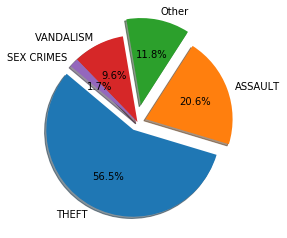

In [70]:
#plt.pie(crime_data_clean_df, explode=explode, labels=pies, colors=colors,
#        autopct="%1.1f%%", shadow=True, startangle=140)
#plt.pie(crime_grouping)
explode = (0.1, 0.1, 0.2, 0, 0)
plt.pie(crime_grouping, explode=explode, labels=crime_grouping.index, 
        autopct="%1.1f%%", shadow=True, startangle=140)

In [ ]:
#reset index to see results as a dataframe
#pd.DataFrame(crime_data_clean_df['Crm Cd Desc'].value_counts()).reset_index()